In [1]:
print("Fulfillment KPI Dashboard Project Started")


Fulfillment KPI Dashboard Project Started


In [18]:
# Michigan Fulfillment KPI Dashboard
# Simulated Amazon Style Data for Portfolio Use
# Author: Bushra Ahmed

import os
import random
from datetime import datetime, timedelta

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [20]:
random.seed(2025)

OUTPUT_DIR = "outputs"
DATA_DIR = "data"
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

num_orders = 10000
start_date = datetime(2024, 12, 1)
date_span_days = 16  # Dec 1 to Dec 16 inclusive

# Michigan Amazon style centers (codes)
centers = ["DTW1", "DET2", "DET3", "DTW5"]

# Weighted volumes to feel realistic (not perfectly equal)
# Higher weight = more orders routed to that facility
center_weights = [0.35, 0.20, 0.25, 0.20]

rows = []

for i in range(1, num_orders + 1):
    order_id = 1000 + i

    # Spread orders across the 16 day window
    order_date = start_date + timedelta(days=random.randint(0, date_span_days - 1))

    # Promised ship time (Prime style)
    promised_days = random.choice([1, 2, 2, 2, 3])  # 2 day is most common
    promised_ship_date = order_date + timedelta(days=promised_days)

    # Actual ship delay
    # Most ship within 0 to 2 days, sometimes longer (peak, staffing, inventory)
    ship_delay = random.choices(
        population=[0, 1, 2, 3, 4],
        weights=[0.20, 0.40, 0.28, 0.09, 0.03],
        k=1
    )[0]
    ship_date = order_date + timedelta(days=ship_delay)

    # Pick and pack times in minutes
    # Pick is usually longer than pack
    pick_time = random.randint(6, 28)
    pack_time = random.randint(3, 16)

    # Items per order, 1 to 5 with 1 to 2 most common
    items_ordered = random.choice([1, 1, 2, 2, 2, 3, 4, 5])

    # Backorder simulation
    backorder_flag = "Yes" if random.random() < 0.06 else "No"  # 6 percent

    # Accuracy simulation
    # If backordered, not all items ship correctly
    # If not backordered, rare mistakes
    if backorder_flag == "Yes":
        items_shipped_correctly = max(0, items_ordered - random.choice([1, 1, 2]))
    else:
        items_shipped_correctly = items_ordered if random.random() > 0.02 else max(0, items_ordered - 1)

    # Assign a fulfillment center using weights
    fulfillment_center = random.choices(centers, weights=center_weights, k=1)[0]

    rows.append({
        "order_id": order_id,
        "order_date": order_date,
        "ship_date": ship_date,
        "promised_ship_date": promised_ship_date,
        "pick_time_minutes": pick_time,
        "pack_time_minutes": pack_time,
        "items_ordered": items_ordered,
        "items_shipped_correctly": items_shipped_correctly,
        "backorder_flag": backorder_flag,
        "fulfillment_center": fulfillment_center
    })

df = pd.DataFrame(rows)

# Save dataset snapshot for realism in GitHub repo
df.to_csv(os.path.join(DATA_DIR, "simulated_fulfillment_orders.csv"), index=False)

df.head(5)

,order_id,order_date,ship_date,promised_ship_date,pick_time_minutes,pack_time_minutes,items_ordered,items_shipped_correctly,backorder_flag,fulfillment_center
0,1001,2024-12-03,2024-12-06,2024-12-05,22,3,3,3,No,DTW1
1,1002,2024-12-13,2024-12-13,2024-12-14,12,9,1,1,No,DET3
2,1003,2024-12-03,2024-12-05,2024-12-05,6,14,2,2,No,DET3
3,1004,2024-12-15,2024-12-16,2024-12-17,6,12,1,1,No,DTW1
4,1005,2024-12-02,2024-12-04,2024-12-03,23,8,1,1,No,DTW1


In [21]:
df["cycle_time_days"] = (df["ship_date"] - df["order_date"]).dt.days
df["on_time_flag"] = df["ship_date"] <= df["promised_ship_date"]
df["accuracy_flag"] = (df["items_shipped_correctly"] == df["items_ordered"]) & (df["backorder_flag"] == "No")

# Safety checks (professional habit)
df["cycle_time_days"] = df["cycle_time_days"].clip(lower=0)


total_orders = len(df)
avg_cycle_time = df["cycle_time_days"].mean()
on_time_rate = df["on_time_flag"].mean() * 100
accuracy_rate = df["accuracy_flag"].mean() * 100
backorder_rate = (df["backorder_flag"] == "Yes").mean() * 100

kpis = pd.DataFrame({
    "KPI": [
        "Total Orders",
        "Avg Cycle Time (days)",
        "On Time Shipment Rate (%)",
        "Order Accuracy Rate (%)",
        "Backorder Rate (%)"
    ],
    "Value": [
        total_orders,
        round(avg_cycle_time, 2),
        round(on_time_rate, 2),
        round(accuracy_rate, 2),
        round(backorder_rate, 2)
    ]
})

kpis

,KPI,Value
0,Total Orders,10000.00
1,Avg Cycle Time (days),1.35
2,On Time Shipment Rate (%),84.38
3,Order Accuracy Rate (%),91.79
4,Backorder Rate (%),6.16


In [14]:
total_orders = len(df)

avg_cycle_time = df["cycle_time_days"].mean()

on_time_rate = df["on_time_flag"].mean() * 100
accuracy_rate = df["accuracy_flag"].mean() * 100
backorder_rate = (df["backorder_flag"] == "Yes").mean() * 100

kpis = pd.DataFrame({
    "KPI": [
        "Total Orders",
        "Avg Cycle Time (days)",
        "On Time Shipment Rate (%)",
        "Order Accuracy Rate (%)",
        "Backorder Rate (%)"
    ],
    "Value": [
        total_orders,
        round(avg_cycle_time, 2),
        round(on_time_rate, 2),
        round(accuracy_rate, 2),
        round(backorder_rate, 2)
    ]
})

kpis


,KPI,Value
0,Total Orders,10000.00
1,Avg Cycle Time (days),2.00
2,On Time Shipment Rate (%),60.01
3,Order Accuracy Rate (%),87.10
4,Backorder Rate (%),8.28


In [23]:
daily = df.groupby(df["order_date"].dt.date).agg(
    orders=("order_id", "count"),
    avg_cycle_time=("cycle_time_days", "mean"),
    on_time_rate=("on_time_flag", "mean"),
    accuracy_rate=("accuracy_flag", "mean")
).reset_index().rename(columns={"order_date": "date"})

daily["date"] = pd.to_datetime(daily["date"])
daily["on_time_rate_pct"] = daily["on_time_rate"] * 100
daily["accuracy_rate_pct"] = daily["accuracy_rate"] * 100

by_center = df.groupby("fulfillment_center").agg(
    orders=("order_id", "count"),
    avg_cycle_time=("cycle_time_days", "mean"),
    on_time_rate=("on_time_flag", "mean"),
    accuracy_rate=("accuracy_flag", "mean"),
    backorder_rate=("backorder_flag", lambda s: (s == "Yes").mean())
).reset_index()

by_center["on_time_rate_pct"] = by_center["on_time_rate"] * 100
by_center["accuracy_rate_pct"] = by_center["accuracy_rate"] * 100
by_center["backorder_rate_pct"] = by_center["backorder_rate"] * 100


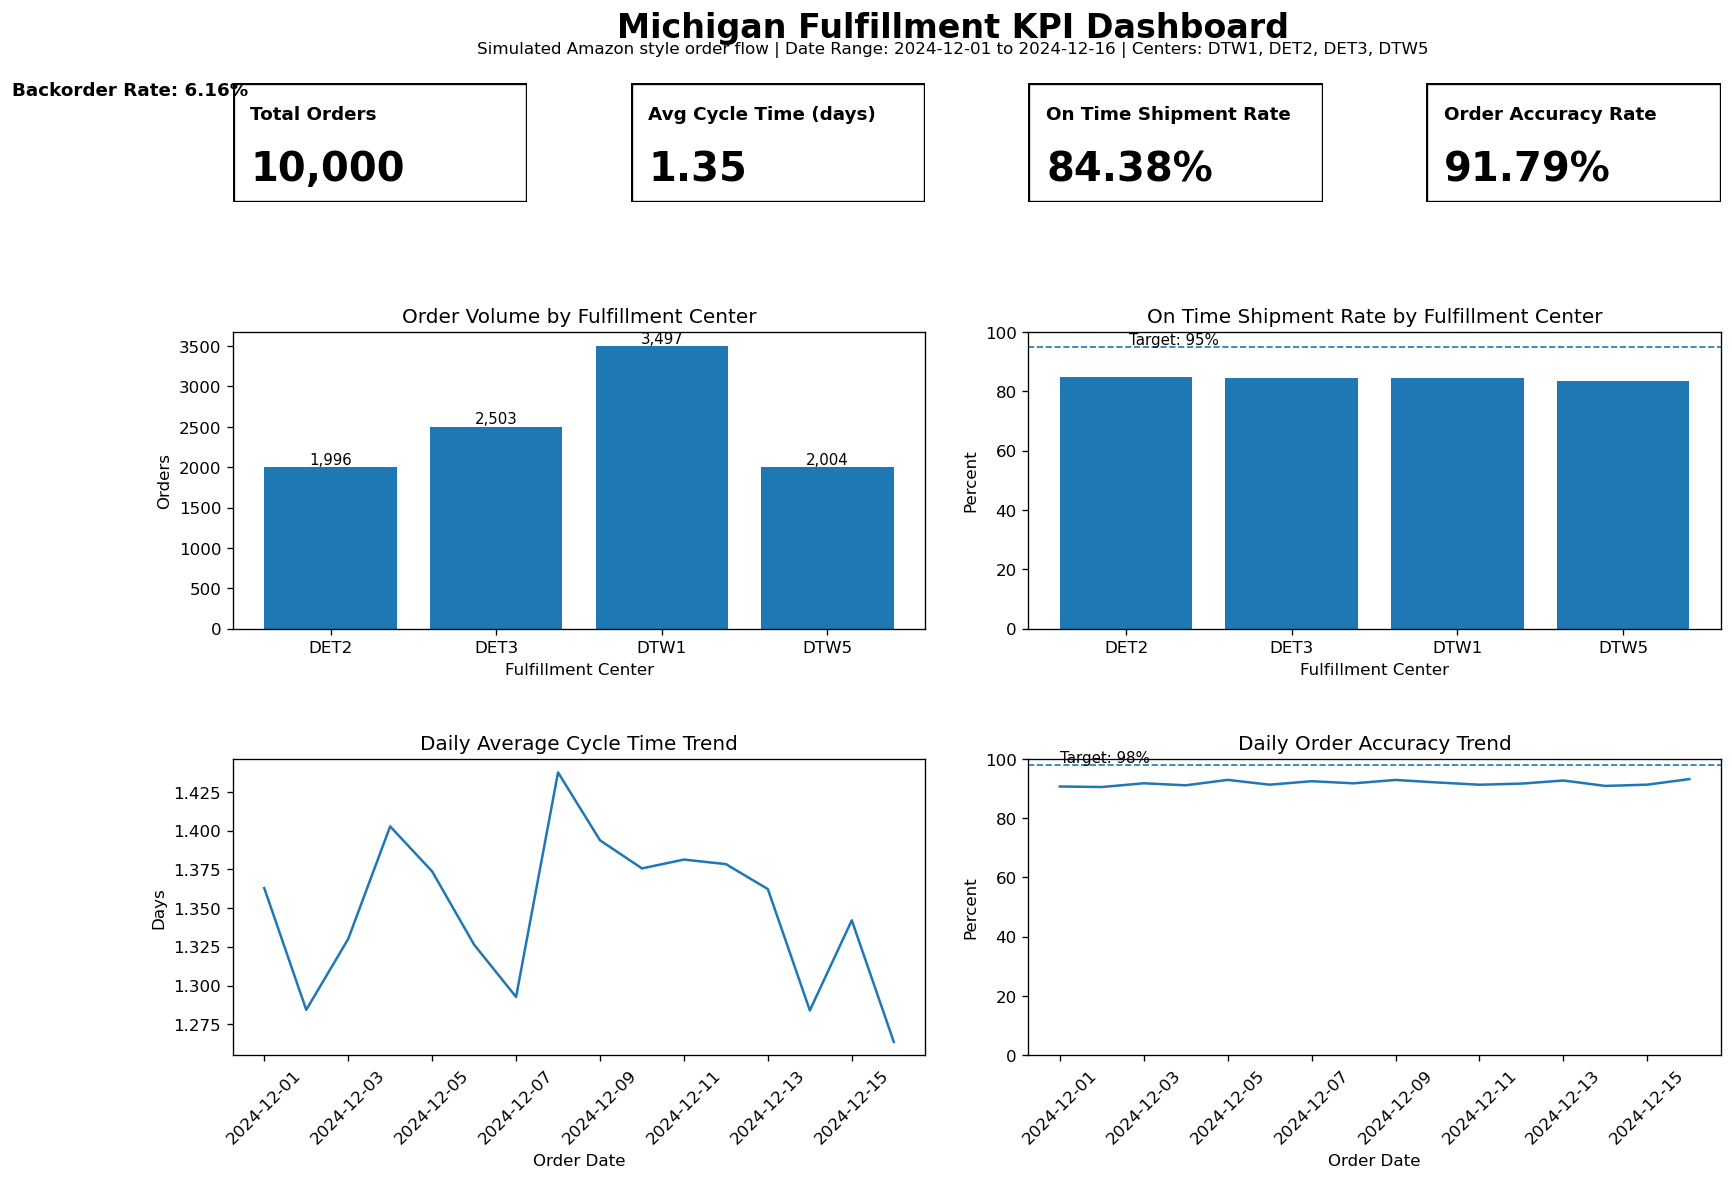

'outputs/fulfillment_kpi_dashboard.png'

In [25]:
plt.rcParams["figure.dpi"] = 120

kpi_total_orders = int(total_orders)
kpi_avg_cycle = round(avg_cycle_time, 2)
kpi_on_time = round(on_time_rate, 2)
kpi_accuracy = round(accuracy_rate, 2)
kpi_backorder = round(backorder_rate, 2)

fig = plt.figure(figsize=(16, 10))
gs = GridSpec(3, 4, figure=fig, height_ratios=[1.2, 3, 3], hspace=0.55, wspace=0.35)

fig.suptitle(
    "Michigan Fulfillment KPI Dashboard",
    fontsize=20,
    fontweight="bold",
    y=0.98
)

subtitle = f"Simulated Amazon style order flow | Date Range: {df['order_date'].min().date()} to {df['order_date'].max().date()} | Centers: {', '.join(centers)}"
fig.text(0.5, 0.945, subtitle, ha="center", fontsize=10)

# KPI cards
kpi_titles = ["Total Orders", "Avg Cycle Time (days)", "On Time Shipment Rate", "Order Accuracy Rate"]
kpi_values = [f"{kpi_total_orders:,}", f"{kpi_avg_cycle:.2f}", f"{kpi_on_time:.2f}%", f"{kpi_accuracy:.2f}%"]

for idx in range(4):
    ax = fig.add_subplot(gs[0, idx])
    ax.set_axis_off()
    ax.text(0.06, 0.70, kpi_titles[idx], fontsize=11, fontweight="bold", transform=ax.transAxes)
    ax.text(0.06, 0.18, kpi_values[idx], fontsize=24, fontweight="bold", transform=ax.transAxes)
    ax.add_patch(plt.Rectangle((0, 0), 1, 1, fill=False, linewidth=2, transform=ax.transAxes))

# Backorder note
fig.text(0.01, 0.91, f"Backorder Rate: {kpi_backorder:.2f}%", fontsize=11, fontweight="bold")

# Chart 1: Orders by center
ax1 = fig.add_subplot(gs[1, 0:2])
ax1.bar(by_center["fulfillment_center"], by_center["orders"])
ax1.set_title("Order Volume by Fulfillment Center")
ax1.set_xlabel("Fulfillment Center")
ax1.set_ylabel("Orders")

# add value labels
for x, v in zip(by_center["fulfillment_center"], by_center["orders"]):
    ax1.text(x, v, f"{int(v):,}", ha="center", va="bottom", fontsize=9)

# Chart 2: On time rate by center + goal line
ax2 = fig.add_subplot(gs[1, 2:4])
ax2.bar(by_center["fulfillment_center"], by_center["on_time_rate_pct"])
ax2.set_title("On Time Shipment Rate by Fulfillment Center")
ax2.set_xlabel("Fulfillment Center")
ax2.set_ylabel("Percent")
ax2.set_ylim(0, 100)

goal_on_time = 95
ax2.axhline(goal_on_time, linestyle="--", linewidth=1)
ax2.text(0.02, goal_on_time + 1, "Target: 95%", fontsize=9)

# Chart 3: Cycle time trend
ax3 = fig.add_subplot(gs[2, 0:2])
ax3.plot(daily["date"], daily["avg_cycle_time"])
ax3.set_title("Daily Average Cycle Time Trend")
ax3.set_xlabel("Order Date")
ax3.set_ylabel("Days")
ax3.tick_params(axis="x", rotation=45)

# Chart 4: Accuracy trend + goal line
ax4 = fig.add_subplot(gs[2, 2:4])
ax4.plot(daily["date"], daily["accuracy_rate_pct"])
ax4.set_title("Daily Order Accuracy Trend")
ax4.set_xlabel("Order Date")
ax4.set_ylabel("Percent")
ax4.set_ylim(0, 100)
ax4.tick_params(axis="x", rotation=45)

goal_accuracy = 98
ax4.axhline(goal_accuracy, linestyle="--", linewidth=1)
ax4.text(daily["date"].min(), goal_accuracy + 1, "Target: 98%", fontsize=9)

plt.subplots_adjust(top=0.92, hspace=0.6, wspace=0.4)

dashboard_path = os.path.join(OUTPUT_DIR, "fulfillment_kpi_dashboard.png")
plt.savefig(dashboard_path, dpi=220, bbox_inches="tight")
plt.show()

dashboard_path